In [1]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# Generate config file
def config_write(G, filename):
    edges = list(G.edges)
    cfg = []
    cfg.append(str(len(G)) + '\n')
    cfg.append(str(len(edges)) + '\n')
    for i in range(len(edges)):
        cfg.append(str(edges[i][0]) + '-' + str(edges[i][1]) + '\n')

    f = open(filename, 'w+')
    f.writelines(cfg)
    f.close()

def component(n,p):
    largest_cc =[]
    bridge=True
    while len(largest_cc)!=n or bridge:
        Graph=nx.fast_gnp_random_graph(n,p)
        largest_cc = max(nx.connected_components(Graph), key=len)
        bridge=nx.has_bridges(Graph)
    return(Graph)

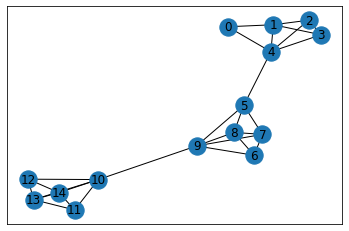

In [4]:
# LINEAR FORMATION
#The bottleneck node is labeled as the number of nodes entered-1
num_cluster = 3
node_per_cluster = 5
p = 0.9
nw = []
for i in range(num_cluster):
    nw.append(component(node_per_cluster,p))

#Shift the numbering of the second graph
mapping = [{} for i in range(num_cluster-1)]
for i in range(node_per_cluster):
    for j in range(num_cluster-1):
        mapping[j][i] = i + node_per_cluster*(j+1)

# Relabling nodes
for i in range(num_cluster-1):
    nw[i+1] = nx.relabel_nodes(nw[i+1], mapping[i])

# Connect graphs
G = nx.compose(nw[0], nw[1])
for i in range(2, num_cluster):
    G = nx.compose(G, nw[i])

# add bottle neck edge
for i in range(1, num_cluster):
    G.add_edge(i*node_per_cluster-1, i*node_per_cluster)

# draw network
nx.draw_networkx(G)
plt.savefig('../graphs/line3.png')
plt.show()

# write network to config file
config_write(G,'../config_files/line3.cfg')